# Overview

Data Source:
- Use data from the [Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2): Crimes 2001 to Present, which includes type of crime, date/time, lat/long, District/ward, arrests, etc.

Helper Notebook:
- Use the helper notebook in this [repository](https://github.com/coding-dojo-data-science/preparing-chicago-crime-data) to process your manually-downloaded csv into several .csv.gz files

Supplemental Data:
- To answer some of the possible questions, you may need to perform some feature engineering, like adding holiday information from an API on this [Holiday Data](https://docs.google.com/spreadsheets/d/1d8hoZzDAhbWx6EwNjrMTTOE5-23Pr1VxJeUxVj1JL9U/edit?usp=sharing).

## Possible Questions to consider:
1) Comparing Police Districts:
 - Which district has the most crimes? Which has the least?
2) Crimes Across the Years:
  - Is the total number of crimes increasing or decreasing across the years?
  - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
3) Comparing AM vs. PM Rush Hour:
  - Are crimes more common during AM rush hour or PM rush hour?
    - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
    - You can consider any crime that occurred between 4 -7 PM as PM rush hour.
  - What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
  - Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
4) Comparing Months:
  - What months have the most crime? What months have the least?
  - Are there any individual crimes that do not follow this pattern? If so, which crimes?
5) Comparing Holidays:
  - Are there any holidays that show an increase in the # of crimes?
  - Are there any holidays that show a decrease in the # of crimes?

# Imports

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import datetime as dt
from matplotlib import dates as mdates

import warnings
warnings.filterwarnings('ignore')

# Functions

In [2]:
# import data into variables
def import_files():
    """Reads in .csv files from Data folder and names them
    dynamically with appropriate year"""
    
    
    file_name_template = "Chicago-Crime_{}"
    years = range(2001, 2024)
    
    # initialize dictionary to save files to
    data = {}
    
    # iterate through years
    for year in years:
        
        # recreate the file name
        file_name = file_name_template.format(year)
        
        # save file path based on file name
        file_path = f"Data/{file_name}.csv"
        
        # import as df
        df = pd.read_csv(file_path)
        
        # store in dictionary
        data[file_name] = df
        
        # replace dash (not allowed in python variable
        # names) with underscore
        # initialize new dictionary
        new_data = {}
            
        # loop through dict items
        for key, value in data.items():
            
            # if dash in key
            if "-" in key:
                
                # replace dash with underscore and save as new key
                new_key = key.replace("-", "_")
                
            # else new key is same as old key
            else:
                new_key = key
                
            # add new key with corresponding value to new dict
            new_data[new_key] = value
        
    # return dictionary
    return new_data

# Data Loading

In [3]:
# call function and store in variable
imported_data = import_files()

# assign values to variables based on key names
for key, value in imported_data.items():
    globals()[key] = value
    
Chicago_Crime_2023

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,12939189,01/01/2023 01:00:00 AM,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,423,4.0,7.0,41.736726,-87.556955
1,12944345,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,633,6.0,9.0,41.728305,-87.613136
2,12938688,01/01/2023 01:00:00 AM,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,STREET,False,False,1632,16.0,38.0,41.944491,-87.787524
3,12944392,01/01/2023 01:00:00 PM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,915,9.0,11.0,41.833927,-87.641312
4,12943227,01/01/2023 01:00:00 AM,ROBBERY,STRONG ARM - NO WEAPON,CTA TRAIN,False,False,1132,11.0,24.0,41.873907,-87.725430
...,...,...,...,...,...,...,...,...,...,...,...,...
122001,13122057,06/28/2023 12:47:00 AM,ROBBERY,ARMED - HANDGUN,CAR WASH,False,False,1221,12.0,36.0,41.890695,-87.684644
122002,13122505,06/28/2023 12:50:00 PM,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,APARTMENT,False,False,1931,19.0,32.0,41.934429,-87.675762
122003,13122064,06/28/2023 12:50:00 AM,ROBBERY,ARMED - HANDGUN,STREET,False,False,1135,11.0,28.0,41.867514,-87.686846
122004,13122624,06/28/2023 12:50:00 PM,ROBBERY,AGGRAVATED,SIDEWALK,False,False,513,5.0,9.0,41.694309,-87.620794


# Data Prep

In [8]:
df_list = [globals()[name] for name in imported_data.keys() if isinstance(globals()[name], pd.DataFrame)]
df = pd.concat(df_list)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7834343 entries, 0 to 122005
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 672.4+ MB


In [9]:
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
1,1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
2,1311933,01/01/2001 01:00:00 AM,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
3,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623
4,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
...,...,...,...,...,...,...,...,...,...,...,...,...
122001,13122057,06/28/2023 12:47:00 AM,ROBBERY,ARMED - HANDGUN,CAR WASH,False,False,1221,12.0,36.0,41.890695,-87.684644
122002,13122505,06/28/2023 12:50:00 PM,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,APARTMENT,False,False,1931,19.0,32.0,41.934429,-87.675762
122003,13122064,06/28/2023 12:50:00 AM,ROBBERY,ARMED - HANDGUN,STREET,False,False,1135,11.0,28.0,41.867514,-87.686846
122004,13122624,06/28/2023 12:50:00 PM,ROBBERY,AGGRAVATED,SIDEWALK,False,False,513,5.0,9.0,41.694309,-87.620794


In [10]:
# Null Values
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10679
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Latitude                 87853
Longitude                87853
dtype: int64

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y %I:%M:%S %p')

df['Date']

0        2001-01-01 13:00:00
1        2001-01-01 01:00:00
2        2001-01-01 01:00:00
3        2001-01-01 01:00:00
4        2001-01-01 01:00:00
                 ...        
122001   2023-06-28 00:47:00
122002   2023-06-28 12:50:00
122003   2023-06-28 00:50:00
122004   2023-06-28 12:50:00
122005   2023-06-28 00:51:00
Name: Date, Length: 7834343, dtype: datetime64[ns]

In [13]:
# set datetime column as index
df_ts = df.set_index('Date')

df_ts

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 13:00:00,1323184,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
2001-01-01 01:00:00,1328315,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
2001-01-01 01:00:00,1311933,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,1434,14.0,NaN,41.910797,-87.682214
2001-01-01 01:00:00,1330412,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,41.917383,-87.648623
2001-01-01 01:00:00,1311735,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 00:47:00,13122057,ROBBERY,ARMED - HANDGUN,CAR WASH,False,False,1221,12.0,36.0,41.890695,-87.684644
2023-06-28 12:50:00,13122505,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,APARTMENT,False,False,1931,19.0,32.0,41.934429,-87.675762
2023-06-28 00:50:00,13122064,ROBBERY,ARMED - HANDGUN,STREET,False,False,1135,11.0,28.0,41.867514,-87.686846


In [15]:
resample_df = df_ts.copy()
resample_df['Total Crimes'] = 1

# resample and count with .sum()
resample_df = resample_df.resample('D').sum(numeric_only = True)

resample_df.head()

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Count
Date,,,,,,,,,
2001-01-01,4011740634,400,289,2267987,21147.0,8194.0,72641.077994,-152199.715024,1825
2001-01-02,1545846568,383,146,1404493,12797.0,147.0,47664.670569,-99856.853277,1143
2001-01-03,1542074517,343,162,1462886,13359.0,132.0,48045.805839,-100651.350927,1151
2001-01-04,1555657957,377,131,1397040,12994.0,0.0,48785.523718,-102222.916683,1166
2001-01-05,1701884634,415,159,1530155,14044.0,156.0,52769.463977,-110554.590960,1267


I now have my data and my resampled data.  
- **df_ts** has one row per instance of a crime
- **resample_df** has one row per day
  - The total number of crimes committed are in the new column 'Total Crimes' 

# Questions

## Which district has the most crimes and which has the least?

In [37]:
df_ts['District'] = df_ts['District'].astype('Int64')
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7834343 entries, 2001-01-01 13:00:00 to 2023-06-28 00:51:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              Int64  
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: Int64(1), bool(2), float64(3), int64(2), object(3)
memory usage: 620.1+ MB


In [38]:
# counts per district
df_ts['District'].value_counts(dropna = False)

8       526293
11      502542
6       458161
7       452550
25      445568
4       444761
3       397294
12      388577
9       382609
2       371075
19      352031
18      351635
5       347006
10      337561
15      335427
1       317262
14      302978
16      262389
22      256751
24      236828
17      226112
20      138637
31         245
<NA>        47
21           4
Name: District, dtype: Int64

In [39]:
# percentages of crimes
df_ts['District'].value_counts(dropna = False, normalize = True)

8       0.067178
11      0.064146
6       0.058481
7       0.057765
25      0.056874
4       0.056771
3       0.050712
12      0.049599
9       0.048837
2       0.047365
19      0.044934
18      0.044884
5       0.044293
10      0.043087
15      0.042815
1       0.040496
14      0.038673
16      0.033492
22      0.032772
24      0.030229
17      0.028862
20      0.017696
31      0.000031
<NA>    0.000006
21      0.000001
Name: District, dtype: Float64

### Visualizations

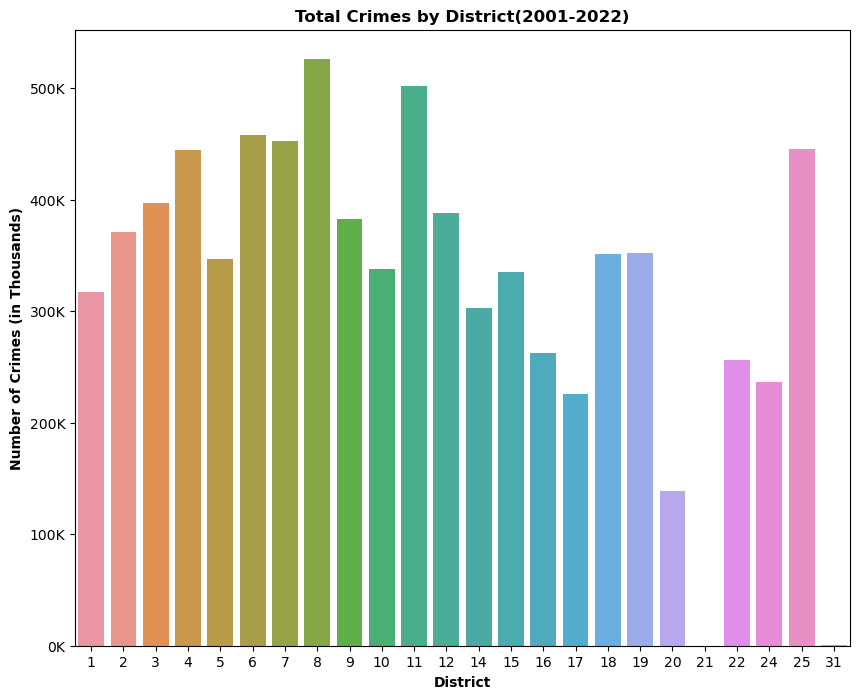

In [52]:
# function to format y-axis units
def thousands(x, pos):
    """formats count in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"


district_info = df_ts['District'].value_counts()

fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.barplot(x = district_info.index, y = district_info.values)


fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)

ax.set_title('Total Crimes by District(2001-2022)', weight = 'bold')
ax.set_ylabel('Number of Crimes (in Thousands)', weight = 'bold')
ax.set_xlabel('District', weight = 'bold');

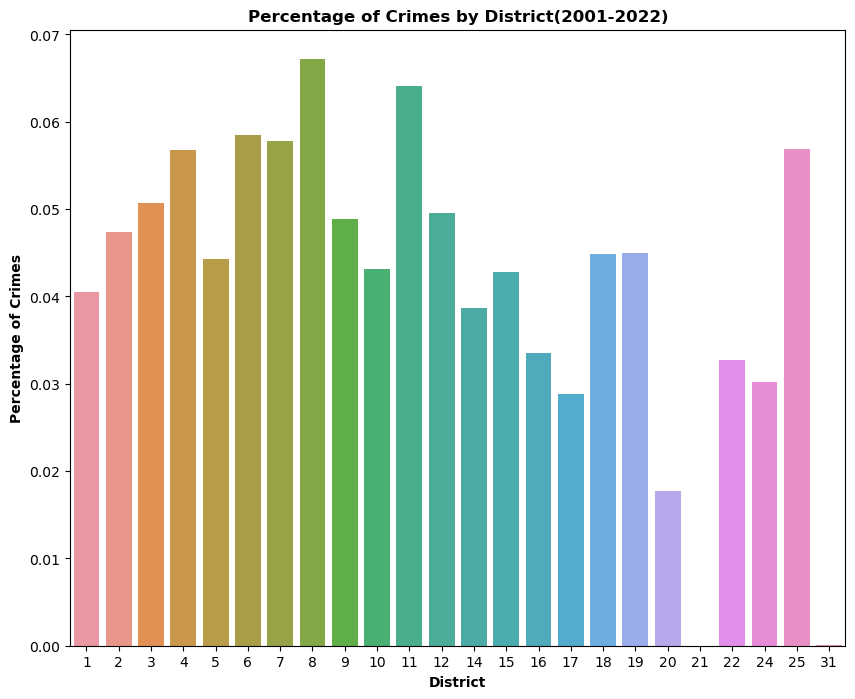

In [51]:
district_info = df_ts['District'].value_counts(dropna = True, normalize = True)

fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.barplot(x = district_info.index, y = district_info.values)

ax.set_title('Percentage of Crimes by District(2001-2022)', weight = 'bold')
ax.set_ylabel('Percentage of Crimes', weight = 'bold')
ax.set_xlabel('District', weight = 'bold');